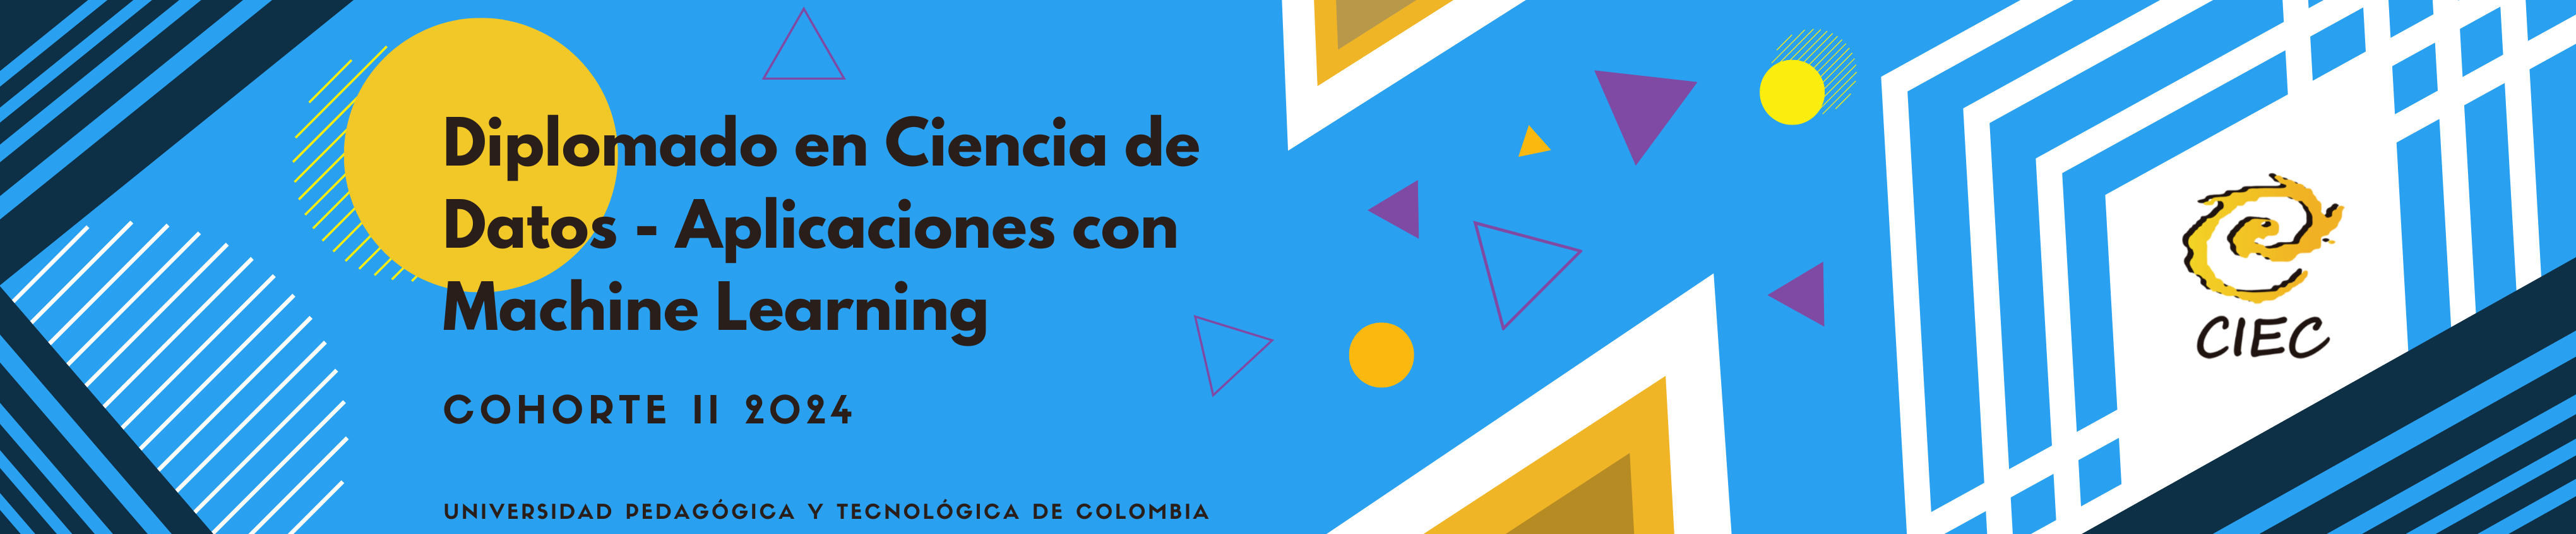

<!-- Main Title -->

**<h1 style="color: #FECB05; text-align: center;"> Regresión Lineal I: Fundamentos </h1>**

---

**<h2 style="color: #007ACC;">Autores</h2>**

- [Andrés Felipe Flórez Olivera](https://www.linkedin.com/in/felipeflorezo/)

---

<!-- Table of Contents -->
**<h2 style="color: #007ACC;">Tabla de contenido</h2>**

- [<span style="color: #005C99;">Conceptos Fundamentales</span>](#section1)
  - [<span style="color: #003366;">1.1. Datos no Etiquetados</span>](#subsection11)
  - [<span style="color: #003366;">1.2. Medidas de Similaridad y Distancia</span>](#subsection12)
- [<span style="color: #005C99;">2. Agrupamiento (Clustering)</span>](#section2)
  - [<span style="color: #003366;">2.1. K-Means (K-Promedios)</span>](#subsection21)
    - [<span style="color: #003366;">2.1.1. Caso Aplicado: Cuantificación del color mediante K-Means </span>](#subsection211)
  - [<span style="color: #003366;">2.2. Agrupamiento Jerárquico</span>](#subsection22)
  - [<span style="color: #003366;">2.3. DBSCAN</span>](#subsection23)

---

**<h2 style="color: #007ACC;">Introducción</h2>**

La regresión lineal es una técnica estadística ampliamente utilizada para predecir o explicar una variable numérica continua, basada en la relación lineal entre una variable dependiente y una o más variables independientes. Fue introducida por Francis Galton para estudiar la relación entre la altura de padres e hijos. En ciencia de datos, es una herramienta clave para la predicción y la inferencia estadística, buscando el mejor ajuste lineal entre las variables.

---

# <!-- Section 1 -->
**<h2 id="section1" style="color: #007ACC;">Regresión lineal simple</h2>**

El modelo de regresión lineal se expresa como una función lineal que relaciona una variable dependiente \( y \) con una variable independiente \( x \), de la siguiente forma:

$$y = f(x) = \alpha + \beta x + \epsilon$$

Aquí, \( \epsilon \) es el término de error, que representa la diferencia entre el valor real de \( y \) y su valor predicho, \( \hat{y} \). La predicción se da por:

$$\hat{y} = \alpha + \beta x$$

Por lo tanto, el error \( \epsilon \) se define como:

$$\epsilon = y - \hat{y} = y - (\alpha + \beta x)$$

Al considerar que \( y \) es una función lineal de \( x \), podemos aplicar las propiedades del valor esperado, obteniendo:

$$E[y] = \alpha + \beta E[x] + E[\epsilon]$$

Esta expresión refleja cómo el valor esperado de \( y \) depende linealmente del valor esperado de \( x \), asumiendo que el valor esperado del error es cero.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

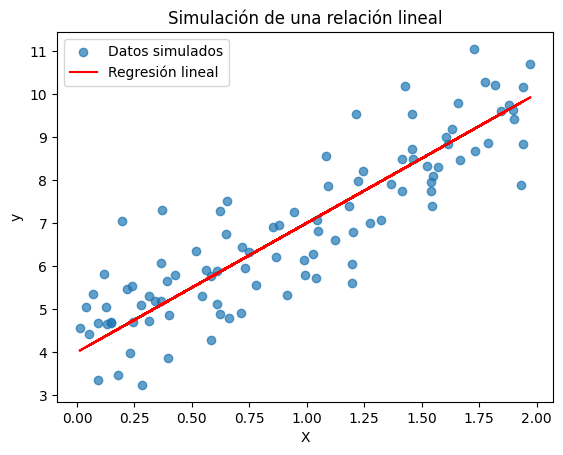

In [3]:
# Simular datos aleatorios
np.random.seed(42)  # Generar semilla
X = 2 * np.random.rand(100, 1)  # Variable independiente
y = 4 + 3 * X + np.random.randn(100, 1)  # Relación lineal con ruido

# Gráfico de datos simulados
plt.scatter(X, y, alpha=0.7, label='Datos simulados')
plt.plot(X, 4 + 3 * X, color='red', label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simulación de una relación lineal')
plt.legend()
plt.show()

**Supuestos del modelo de regresión lineal**

1. Linealidad: Se asume que la relación entre la variable $x$ y la variable $y$ puede ser expresada como una función lineal

2. Independencia: Cada observación es independiente de otra; es decir, el valor de la variable $x$ para el individuo $i$ no se relaciona de ninguna manera con el valor respectivo de la observaciones $i + p$, para todo $p \in \mathit{R}$

3. Homoscedasticidad: La varianza de los errores es independiente del valor de $x$, esto es:

$$V[\epsilon \vert x] = \sigma_{\epsilon} ^{2}$$

4. Normalidad del error: Se asume que $\epsilon \sim N(0, \sigma_{\epsilon}^{2})$. Esto se puede asumir gracias al Teorema del Límite Central.




**Interpretación de los parámetros del modelo de regresión**

Note que el modelo de regresión lineal consiste en la estimación de una ecuación lineal, por lo que sus anatomías coinciden. El modelo consiste en la estimación del intercepto con el eje $y$ y la pendiente de una línea recta en el plano $xy$, por lo que podemos dar las siguientes interpretaciones:

- $\alpha$: Valor en el que el modelo cruza el eje $y$. También puede interpretarse como la respuesta a la pregunta "¿Cuál es el valor esperado de $y$ cuándo $x = 0$?. Esto se sigue de que

$$E[y | x = 0] = \alpha + \beta (0) + E[\epsilon] = \alpha$$

- $\beta$: Pendiente de la ecuación de $y$. También puede interpretarse como la respuesta a la pregunta "¿Cuánto cambia $y$ cuándo $x$ incrementa en una unidad?". Esto se sigue de que

$$\frac{\partial E[y]}{\partial x} = \frac{\partial (\alpha + \beta x)}{\partial x} = \beta$$

**Mínimos Cuadrados Ordinarios**

Una de las preguntas principales es cómo podemos encontrar $\alpha$ y $\beta$ en la ecuación anterior; para esto, definimos una función de pérdida que mida qué tan lejos se encuentra el modelo de la realidad (con base en los datos de muestra). Es decir, que el interés se encuentra en resolver el siguiente problema:

$$(\alpha, \beta) = \arg \min_{\alpha, \beta} h(\epsilon)$$

El método más famoso para resolver este problema se conoce con el nombre de **Mínimos Cuadrados Ordinarios**, y consiste en definir la función de pérdida de la siguiente manera:

$$h(\epsilon) = \frac{1}{N} \sum_{i=1}^{n} \epsilon^{2} = \frac{1}{n} \sum_{1}^{N} (y - \alpha - \beta x)^2$$

A esta ecuación se le conoce con el nombre de **Error Cuadrático Medio**, y si la utilizamos para resolver el problema de minimización de la función de pérdida obtendremos los estimadores de **Mínimos Cuadrados Ordinarios**:

$$ \beta^{*} = \frac{Cov(x, y)}{Var(x)}$$
$$ \alpha^{*} = \bar{y} - \beta^{*} \bar{x} $$

En dónde:

- $Cov(x, y)$: Covarianza entre $x$ e $y$
- $Var(x)$: Varianza de $x$
- $\bar{x}$: Media muestral de $x$
- $\bar{y}$: Media muestral de $y$
- $\beta^{*}$: Valor óptimo de $\beta$
- $\alpha^{*}$: Valor óptimo de $\alpha$

# <!-- Section 2 -->
**<h2 id="section2" style="color: #007ACC;">2. Medidas de robustez</h2>**


Una vez estimado nuestro modelo de regresión, una pregunta importante que vale la pena hacerse es: ¿Qué tan bien nuestro modelo predice, o es capaz de explicar, la variable de respuesta $y$.

1. $R^2$: R-CuadradoR-cuadrado es una métrica de rendimiento útil para comprender qué tan bien el modelo de regresión se ha ajustado sobre los datos de entrenamiento. Por ejemplo, un R-cuadrado del 80% revela que el modelo es capaz de capturar el 80% de la variación en la variable dependiente. Un valor de R-cuadrado más alto indica un mejor ajuste para el modelo. Se obtiene de la siguiente manera:

- Calculamos la suma de cuadrados del error de la regresión:

$$SS_{res} = \sum_{i=1} ^{N} \epsilon_{i} ^2$$

- Calculamos la suma de cuadrados totales de la regresión:

$$SS_{tot} = \sum_{i=1}^{N} (y_{i} - \bar{y}_{i})^2$$

- Obtenemos el $R^2$:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

2. $RMSE$: RMSE significa Raíz del Error Cuadrático Medio. Se calcula como la raíz cuadrada de la media de las diferencias al cuadrado entre la salida real y las predicciones. Cuanto menor sea el RMSE, mejor será el rendimiento del modelo. Matemáticamente, puede expresarse de la siguiente manera:

$$RMSE = \sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_{i} - \alpha^{*} - \beta^{*}x_{i})^2}$$

3. $MAE$: El MAE, o Error Absoluto Medio, es una métrica importante en la evaluación de modelos de regresión. Se calcula como la media de las diferencias absolutas entre las predicciones del modelo y los valores reales. Un MAE más bajo indica un mejor rendimiento del modelo. Matemáticamente, se puede definir de la siguiente manera:

$$MAE = \frac{1}{N} \sum_{i=1}^{N}\vert y_{i} - \hat{y}_{i} \vert $$

<h3> Ejemplo práctico </h3>

Para el siguiente ejercicio práctico aprovecharemos un ejemplo del libro [*Hands-On Machine Learning With Scikit-Learn, Keras and Tensorflow*](https://github.com/ageron/handson-ml3/tree/main) en el que se analiza la relación entre la satisfacción de vida de las personas y el PIB per cápita en los países de la OCDE. Para esto, se usan dos fuentes de informació, los datos de la [OCDE](https://www.oecdbetterlifeindex.org/#/11111111111) sobre satisfacción con la vida, y la información del [Fondo Monetario Internacional](https://www.imf.org/external/datamapper/NGDP_RPCH@WEO/OEMDC/ADVEC/WEOWORLD) sobre el crecimiento económico de los países.

In [4]:
import urllib.request
from pathlib import Path

In [5]:
# Este código permite llamar los datos que se ecuentran en el repositorio del libro

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [6]:
# Se importan los datos a Pandas
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [7]:
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               2369 non-null   object 
 1   Country                2369 non-null   object 
 2   INDICATOR              2369 non-null   object 
 3   Indicator              2369 non-null   object 
 4   MEASURE                2369 non-null   object 
 5   Measure                2369 non-null   object 
 6   INEQUALITY             2369 non-null   object 
 7   Inequality             2369 non-null   object 
 8   Unit Code              2369 non-null   object 
 9   Unit                   2369 non-null   object 
 10  PowerCode Code         2369 non-null   int64  
 11  PowerCode              2369 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  2369 non-null   float64
 15  Flag

In [8]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               7109 non-null   object 
 1   Code                                                 5729 non-null   object 
 2   Year                                                 7109 non-null   int64  
 3   GDP per capita, PPP (constant 2017 international $)  7109 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 222.3+ KB


In [9]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [10]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [11]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


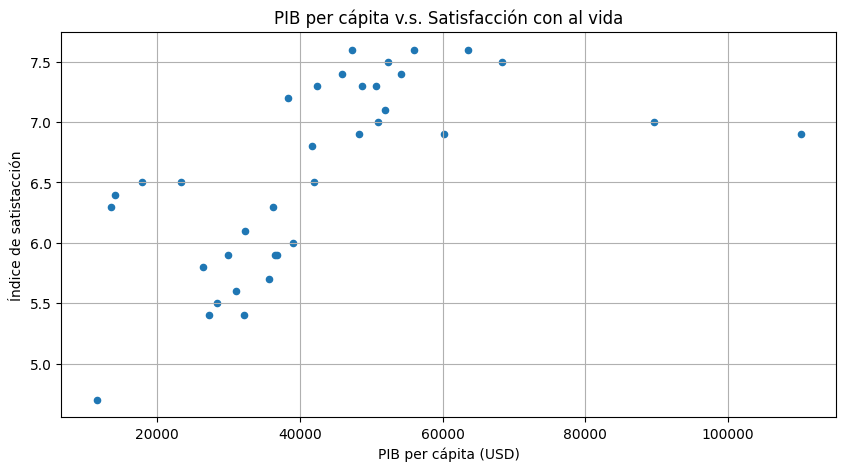

In [12]:
full_country_stats.plot(kind='scatter', figsize=(10, 5), grid=True,
                        x=gdppc_col, y=lifesat_col)

plt.xlabel('PIB per cápita (USD)');
plt.ylabel('Índice de satistacción');
plt.title('PIB per cápita v.s. Satisfacción con al vida');

In [13]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


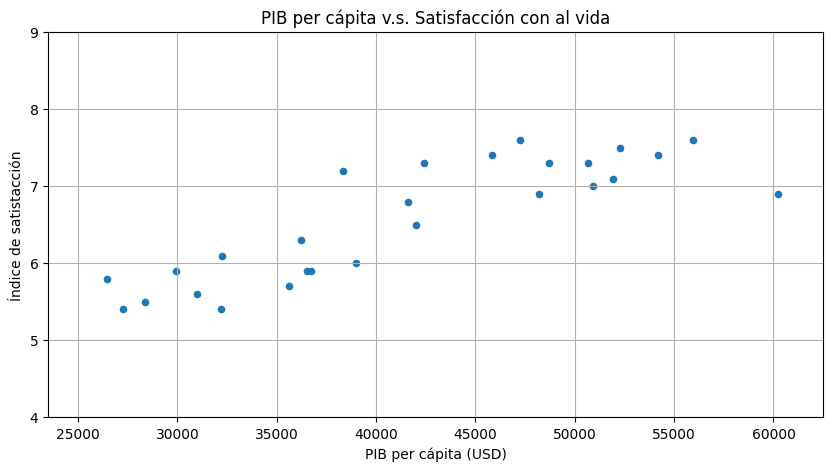

In [14]:
country_stats.plot(kind='scatter', figsize=(10, 5), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.xlabel('PIB per cápita (USD)');
plt.ylabel('Índice de satistacción');
plt.title('PIB per cápita v.s. Satisfacción con al vida');

In [15]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"ɑ={t0:.2f}, β={t1:.2e}")

ɑ=3.75, β=6.78e-05


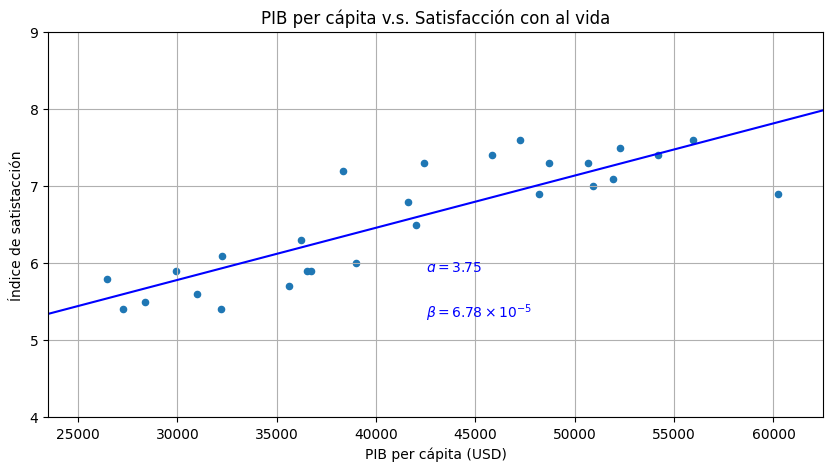

In [16]:
country_stats.plot(kind='scatter', figsize=(10, 5), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$ɑ = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$β = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.xlabel('PIB per cápita (USD)');
plt.ylabel('Índice de satistacción');
plt.title('PIB per cápita v.s. Satisfacción con al vida');
plt.show()


# <!-- Section 3 -->
**<h2 id="section3" style="color: #007ACC;">3. Repaso: Selección y Manipulación de Datos con Pandas</h2>**


Antes de abordar el contenido principal de la regresión lineal, es importante tener en cuenta cómo podemos seleccionar, filtrar y manipular datos en Pandas utilizando los métodos `loc` e `iloc`.

### `loc` vs `iloc`
- **`loc`**: Selecciona datos basados en las etiquetas (índices) de las filas y nombres de las columnas.
- **`iloc`**: Selecciona datos por posición (índices numéricos) de las filas y columnas.

Aquí un ejemplo básico de cómo se utilizan estos dos métodos:
```python
import pandas as pd

df = pd.DataFrame(
    {
        'name': ['Peter', 'Juan', 'Melisa', 'Ana', 'Charles', 'Maria', 'Sonia', 'Peter', 'Melisa', 'Ana', 'Ana'],
        'age': [23, 20, 34, 40, 45, 21, 67, 55, 89, 3, 14]
    },
    index=range(10, 21)
)

# Usando loc para seleccionar por etiquetas de índice y nombres de columna
df.loc[[10, 11, 14], ['age', 'name']]

# Usando iloc para seleccionar por posición
df.iloc[[0, 1, 4], [1]]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Regresion Lineal Simple

In [20]:
from google.colab import files
uploaded = files.upload()

# Then you can read the file like this:
df = pd.read_csv(list(uploaded.keys())[0])

Saving Salary_Data.csv to Salary_Data.csv


In [21]:
# apertura de archivo
ruta = "Salary_Data.csv"

dataset = pd.read_csv(ruta)
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
# Asignación de las variables dependiente e independiente
y = dataset.iloc[:, -1].values
X = dataset.iloc[:, 0].values

#Division de Datos - entrenamiento y validacion
#divide los datos en 20% para la validacion y se colocar una semilla para hacer la division
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=0)

In [23]:
#Modelo de regresion Lineal
regresion = LinearRegression()
regresion.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [24]:
# se usan los valores de x_test para ver  que valores predice el modelo
y_pred = regresion.predict(X_test.reshape(-1,1))


# Se comparan los valores predichos por el modelo con los valores originales

#valores predichos por el modelo
print(y_pred)
#valors originales
y_test

[[ 40835.10590871]
 [123079.39940819]
 [ 65134.55626083]
 [ 63265.36777221]
 [115602.64545369]
 [108125.8914992 ]
 [116537.23969801]
 [ 64199.96201652]
 [ 76349.68719258]
 [100649.1375447 ]]


array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

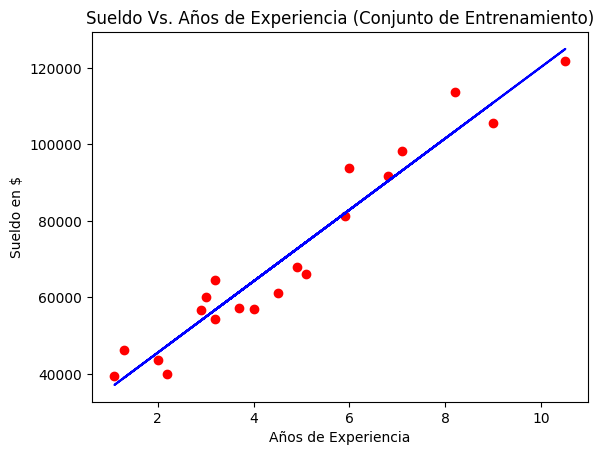

In [25]:
#Visualizar los datos de entrenamiento

plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regresion.predict(X_train.reshape(-1,1)), color="blue")

plt.title("Sueldo Vs. Años de Experiencia (Conjunto de Entrenamiento)")
plt.ylabel("Sueldo en $")
plt.xlabel("Años de Experiencia")
plt.show()

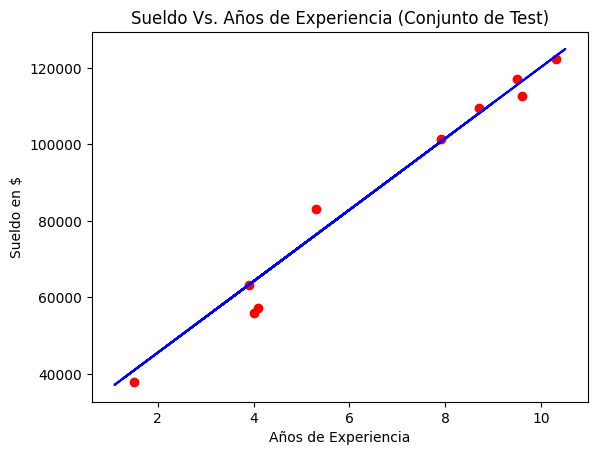

In [26]:
#Visualizar los datos de test

plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, regresion.predict(X_train.reshape(-1,1)), color="blue")

plt.title("Sueldo Vs. Años de Experiencia (Conjunto de Test)")
plt.ylabel("Sueldo en $")
plt.xlabel("Años de Experiencia")
plt.show()

# <!-- Section 4 -->
**<h2 id="section4" style="color: #007ACC;">4. Inferencia Estadística de la Regresión Lineal</h2>**

En la mayoría de ejercicios prácticos los ejercicios de regresión van a realizarse sobre una muestra de datos que proviene de una población, por lo que si queremos extraer conclusiones sobre la población objetivo, debemos apelas a las técnicas de inferencia estadística estudiadas a inicios del diplomado.

Suponga que la variable $\mathbf{Y}$ tiene el siguiente comportamiento poblacional:

$$\mathbf{Y} = \mathbf{X} \mathbf{\beta} + \mathbf{e}$$

Al estimar la regresión por medio de una muestra, obtenemos $\hat{\mathbf{\beta}}$, que esperamos que sea una buena estimación de su parámetro problacional. Dicho de otra manera, $\hat{\beta}$ es una variable aleatoria que sigue una distribución de probabilidad.

En particular, existen tres propiedades importantes que nos gustaría poder garantizar del estimador de $\beta$:

- Insesgamiento:

$$E[\hat{\mathbf{\beta}}] = \mathbf{\beta}$$

Esto quiere decir que si tomamos $K$ muestras aleatorias de nuestra población, y sobre cada una realizamos el ejercicio de estimación de la regresión, el promedio de las estimaciones tenderá a ser igual al valor poblacional.

- Consistencia:

$$\lim_{n \rightarrow \infty} p(\vert \mathbf{\hat{\beta}} - \mathbf{\beta} \vert > \alpha) = 0$$

para todo $\alpha>0$. Esto quiere decir que conforme incrementemos la muestra de nuestro ejercicio, la estimación muestral se irá acercando más al verdadero valor poblacional.

- Normalidad:

$$\mathbf{\hat{\beta}} \sim N \left( \mathbf{\beta}, \sigma^{2}_{\beta} \right)$$

Esta propiedad se puede seguir gracias al Teorema del Límite Central.

En particular, si se cumplen los supuestos de Mínimos Cuadrados Ordinarios vistos en la sesión anterior, estas tres propiedades se verifican.

### <!-- Subsection 4.1 -->
**<h3 id="subsection41" style="color: #003366;">4.1. Distribución Muestral e Inferencia</h3>**

Preparemos una simulación que muestre el comportamiento poblacional de $\beta_{j}$, esto es, el parámetro que acompaña a la variable $x_{j}$

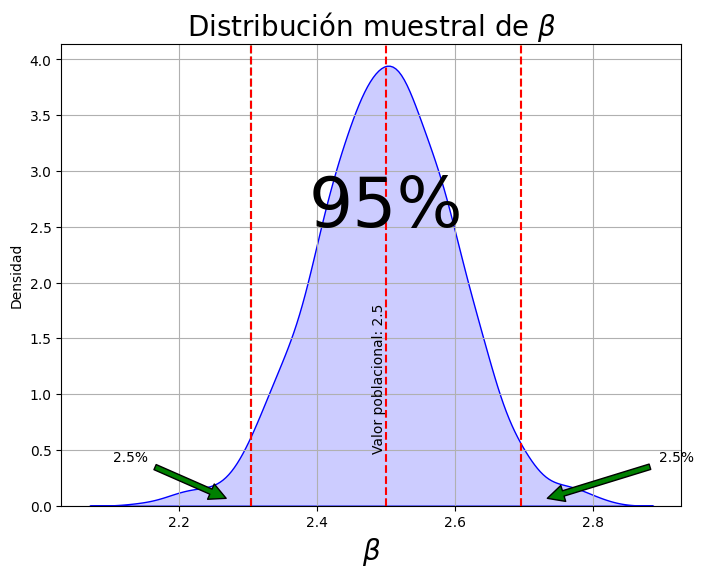

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# True value of beta
true_beta = 2.5

# Number of samples
num_samples = 1000

# Number of data points in each sample
sample_size = 100

# Standard deviation of the error term
error_std = 1.0

# Generate samples and estimate beta for each sample
estimated_betas = []
for _ in range(num_samples):
    # Generate random x values
    x = np.random.normal(loc=0, scale=1, size=sample_size)

    # Generate random errors following a normal distribution
    errors = np.random.normal(loc=0, scale=error_std, size=sample_size)

    # Generate y values using the true relationship y = beta * x + error
    y = true_beta * x + errors

    # Estimate beta using least squares linear regression
    beta_hat = np.dot(x, y) / np.dot(x, x)
    estimated_betas.append(beta_hat)

# Calculate the lower and upper bounds for the 98% interval
lower_bound = np.percentile(estimated_betas, 2.5)
upper_bound = np.percentile(estimated_betas, 97.5)
# Calculate the tails boundaries
tail_left = np.percentile(estimated_betas, 2.5)
tail_right = np.percentile(estimated_betas, 97.5)
# Calculate the midpoint of the 95% interval
midpoint = (lower_bound + upper_bound) / 2

# Plot density curves of estimated betas
plt.figure(figsize=(8, 6))
sns.kdeplot(estimated_betas, color='blue', fill=True, alpha=0.2)
plt.axvline(x=lower_bound, color='green', linestyle='--')
plt.axvline(x=upper_bound, color='orange', linestyle='--')
plt.axvline(x=tail_left, color='red', linestyle='--', label='2.5% tail')
plt.axvline(x=tail_right, color='red', linestyle='--')
plt.axvline(x=2.5, color='red', linestyle='--')
plt.annotate('Valor poblacional: 2.5', xy=(2.5, 0), xytext=(2.48, 0.5), rotation=90)
plt.annotate('2.5%', xy=(tail_left - 0.03, 0.05), xytext=(tail_left - 0.2, 0.4),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('2.5%', xy=(tail_right + 0.03, 0.05), xytext=(tail_right + 0.2, 0.4),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.text(midpoint, 2.5, '95%', ha='center', fontsize=50, color='black')
plt.xlabel(r'$\beta$', fontsize=20)
plt.ylabel('Densidad')
plt.title(r'Distribución muestral de $\beta$', fontsize=20)
#plt.text(lower_bound, 0.02, f'Lower Bound: {lower_bound:.2f}', rotation=90, verticalalignment='bottom', horizontalalignment='right', color='green')
#plt.text(upper_bound, 0.02, f'Upper Bound: {upper_bound:.2f}', rotation=90, verticalalignment='bottom', horizontalalignment='right', color='orange')
#plt.legend()
plt.grid(True)
plt.show()


Conociendo el comportamiento poblacional de los parámetros de la regresión, podemos hacernos preguntas sobre si el valor real del parámetro cae dentro de un intervalo, es cerca de un valor dado, o si es significativamente diferente de $0$. Esta última es la que se pregunta con más frecuencia.

Con base en el gráfico anterior, podemos concluir que con probabilidad 95%

$$\beta_{j} \in \left[\hat{\beta}_{j} - 2 \sigma_{j}, \hat{\beta}_{j} + 2 \sigma_{j} \right]$$


Puntualmente un ejercicio que frecuentemente acompaña al modelo de regresión es contrastar:

$$H_{0}: \beta_{j} = \beta^{*}$$
$$H_{1}: \beta_{j} \neq \beta^{*}$$

para algún $\beta^{*}$. El resultado de este contraste responde a la pregunta de si el valor de $\hat{\beta}$ es estadísticamente significativo igual a $\beta^{*}$; para responder a esto, calculamos el estadístico de prueba:

$$\frac{\beta - \beta^{*}}{se} \sim t $$

donde $se = \frac{\sigma^{2}_{j}}{\sqrt{N}}$, En dónde $\sigma^{2}_{j}$ es la varianza de $\hat{\beta}_{j}$ y $N$ es el tamaño de la muestra.

Así, rechazamos la hipótesis nula añ 95% si $p\left(\frac{\beta - \beta^{*}}{se} \right) < 0.05$.

---
Ejemplo

---

Los datos de la vivienda de California (California Housing) corresponden a unos. datos de juguete sobre algunas viviendas en un vecindario de California. Este conjunto de datos se utiliza bastante para practicar sobre modelos de aprendizaje supervisado y estadística espacial. Aquí el ejercicio principal consiste en ser capaz de predecir o explicar el valor de la vivienda.

In [28]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [29]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [31]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<Axes: >

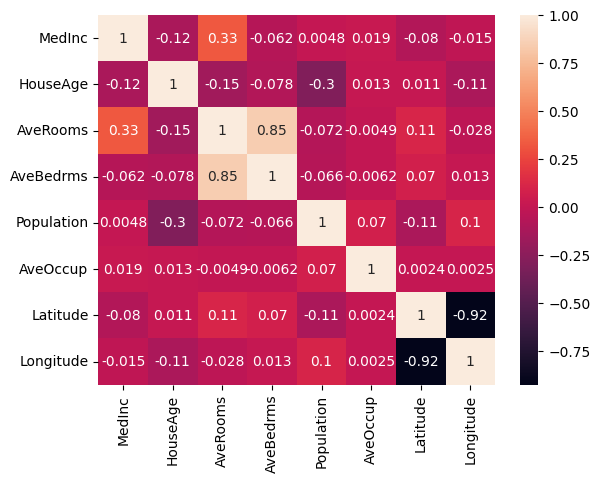

In [32]:
import seaborn as sns

corr_matrix  = housing_df.corr()

sns.heatmap(corr_matrix, annot=True)

Las variables "AveRooms" y "AveBedrms" tienen una alta correlación, y esto podría generar algo de redundancia en el modelo. Una solución es eliminar una de las dos, otra es apelar a un criterio experto que de una justificación sobre por qué dejar una o la otra. En este caso, dejaremos "AveRooms" (esta decisión es arbitraria para efectos ilustrativos). Adicionalmente, eliminaremos las coordenadas, ya que esta información no ofrece ningún valor interpretativo para nuestro ejemplo (estas variables serían interesantes en un ejercicio de estadística espacial, pero no es nuestro caso).

<Axes: >

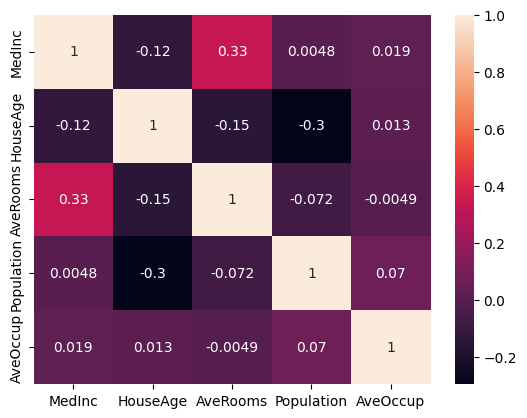

In [33]:
housing_df_drop = housing_df.drop(["AveBedrms", "Latitude", "Longitude"], axis=1)

corr_matrix_drop  = housing_df_drop.corr()

sns.heatmap(corr_matrix_drop, annot=True)

In [34]:
import statsmodels.api as sm

In [35]:
X = housing_df_drop
y = housing.target

# Agregar una columna de unos para el intercepto
X = sm.add_constant(X)
# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()
# Obtener los resultados de la regresión
results = model.summary()
# Imprimir los resultados
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     4372.
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:37:11   Log-Likelihood:                -24787.
No. Observations:               20640   AIC:                         4.959e+04
Df Residuals:                   20634   BIC:                         4.963e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0398      0.026     -1.556      0.1

In [36]:
0.0177*100000

1770.0

In [37]:
print('¿Cuánto agrega de valor la edad de la casa?')
print(0.017*100000)
print(0.019*100000)

¿Cuánto agrega de valor la edad de la casa?
1700.0000000000002
1900.0


In [38]:
print('¿Cuánto agrega de valor un cuarto adicional?')
-0.0258*100000

¿Cuánto agrega de valor un cuarto adicional?


-2580.0

**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Andrés Felipe Florez Olivera

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---